In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel('E:/Data Analyst CapStone/Zomato Project/data.xlsx')

In [5]:
country_code=pd.read_excel('E:/Data Analyst CapStone/Zomato Project/Country-Code.xlsx')

In [6]:
zomato_data=pd.merge(data,country_code)

In [7]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has_able_booking      9551 non-null   object 
 13  Has_Online_delivery   9551 non-null   object 
 14  Price_range           9551 non-null   int64  
 15  Aggregate_rating     

In [8]:
zomato_data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_able_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [9]:
zomato_data.duplicated().sum()#no duplicate records 

0

In [10]:
zomato_data.isna().sum() #it has one value in Restaurant name and 9 values in cuisines so we have to drop it 

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_able_booking        0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

In [11]:
zomato_data.dropna(inplace=True)

In [12]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9541 non-null   int64  
 1   Restaurant_Name       9541 non-null   object 
 2   Country_Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average_Cost_for_two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has_able_booking      9541 non-null   object 
 13  Has_Online_delivery   9541 non-null   object 
 14  Price_range           9541 non-null   int64  
 15  Aggregate_rating     

In [13]:
zomato_data.drop(columns='Rating_color',inplace=True)

In [14]:
zomato_data.drop(columns='Currency',inplace=True)

In [15]:
zomato_data=zomato_data.rename(columns={'Average_Cost_for_two':'Cost','Aggregate_rating':'Ratings'})

In [16]:
zomato_data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Cost', 'Has_able_booking', 'Has_Online_delivery', 'Price_range',
       'Ratings', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [17]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant_ID        9541 non-null   int64  
 1   Restaurant_Name      9541 non-null   object 
 2   Country_Code         9541 non-null   int64  
 3   City                 9541 non-null   object 
 4   Address              9541 non-null   object 
 5   Locality             9541 non-null   object 
 6   Locality Verbose     9541 non-null   object 
 7   Longitude            9541 non-null   float64
 8   Latitude             9541 non-null   float64
 9   Cuisines             9541 non-null   object 
 10  Cost                 9541 non-null   int64  
 11  Has_able_booking     9541 non-null   object 
 12  Has_Online_delivery  9541 non-null   object 
 13  Price_range          9541 non-null   int64  
 14  Ratings              9541 non-null   float64
 15  Rating_text          9541 non-null   o

#Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants


In [18]:
zomato_data_city=zomato_data.groupby('City')['Restaurant_ID'].count()
zomato_data_city

City
Abu Dhabi          20
Agra               20
Ahmedabad          20
Albany             17
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
€¡stanbul          14
Name: Restaurant_ID, Length: 140, dtype: int64

In [19]:
#worldwide distribution of zomato restaurant

In [20]:
print("list of countries zomato is offering its service are:")
for x in pd.unique(zomato_data.Country): print(x)
print()
print(" Total no of countries zomato is offering its service is",len(pd.unique(zomato_data.Country)))

list of countries zomato is offering its service are:
Indonesia
India
Phillipines
Sri Lanka
South Africa
Qatar
Singapore
UAE
Brazil
Turkey
United Kingdom
New Zealand
Australia
United States
Canada

 Total no of countries zomato is offering its service is 15


In [21]:
print("list of cities zomato is offering its service are:")
for x in pd.unique(zomato_data.City): print(x)
print()
print(" Total no of City zomato is offering its service is",len(pd.unique(zomato_data.City)))

list of cities zomato is offering its service are:
Jakarta
Tangerang
Bogor
Bandung
New Delhi
Gurgaon
Agra
Noida
Kanpur
Ghaziabad
Jaipur
Bangalore
Chandigarh
Pune
Chennai
Goa
Hyderabad
Indore
Lucknow
Ludhiana
Panchkula
Ranchi
Faridabad
Kolkata
Ahmedabad
Aurangabad
Bhopal
Mysore
Vizag
Guwahati
Dehradun
Mangalore
Nagpur
Patna
Bhubaneshwar
Coimbatore
Kochi
Mumbai
Nashik
Puducherry
Surat
Vadodara
Amritsar
Varanasi
Allahabad
Secunderabad
Mohali
Pasay City
Mandaluyong City
Taguig City
Makati City
Tagaytay City
Pasig City
San Juan City
Santa Rosa
Quezon City
Colombo
Pretoria
Inner City
Johannesburg
Cape Town
Sandton
Randburg
Doha
Singapore
Abu Dhabi
Dubai
Sharjah
SÌ£o Paulo
BrasÌ_lia
Rio de Janeiro
Ankara
€¡stanbul
London
Manchester
Birmingham
Edinburgh
Wellington City
Auckland
Paynesville
Flaxton
Middleton Beach
Montville
Palm Cove
Tanunda
Armidale
Balingup
Beechworth
East Ballina
Forrest
Hepburn Springs
Huskisson
Lorn
Macedon
Mayfield
Penola
Phillip Island
Trentham East
Victor Harbor
Dicky B

In [22]:
print("list of cities zomato is offering its service are:")
print(zomato_data.groupby('City')['Restaurant_ID'].count())

list of cities zomato is offering its service are:
City
Abu Dhabi          20
Agra               20
Ahmedabad          20
Albany             17
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
€¡stanbul          14
Name: Restaurant_ID, Length: 140, dtype: int64


In [23]:
zomato_data_city.idxmax()

'New Delhi'

In [24]:
zomato_data_city.idxmin()

'Armidale'

In [25]:
zomato_data.Has_able_booking.replace(('Yes','No'),(1,0),inplace=True)

In [26]:
zomato_data.Has_Online_delivery.replace(('Yes','No'),(1,0),inplace=True)

In [27]:
zomato_data

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,0,0,3,4.1,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,0,0,3,4.6,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,0,0,3,4.9,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,0,0,3,4.2,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,0,0,3,4.3,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,17582627,Senor Iguanas,216,Pocatello,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,"Pocatello, Pocatello",-112.443300,42.894200,Mexican,0,0,0,1,3.6,Good,108,United States
9547,16654702,Lake House Restaurant,37,Vineland Station,"3100 N Service Rd, Vineland Station, ON L0R2E0",Vineland Station,"Vineland Station, Vineland Station",-79.379147,43.186870,"Italian, Mediterranean, Pizza",70,0,0,4,4.3,Very Good,204,Canada
9548,16659169,Tokyo Sushi,37,Chatham-Kent,"150 Richmond St, Chatham-Kent, ON N7M2V2",Chatham-Kent,"Chatham-Kent, Chatham-Kent",-82.188438,42.397683,"Japanese, Sushi",25,0,0,2,3.7,Good,176,Canada
9549,16643459,Consort Restaurant,37,Consort,"4931 50th Street, Consort, AB T0C 1B0",Consort,"Consort, Consort",-110.774699,52.008289,"Chinese, Canadian",25,0,0,2,3.0,Average,6,Canada


In [28]:
zomato_data['Has_able_booking'].value_counts()

0    8383
1    1158
Name: Has_able_booking, dtype: int64

In [29]:
zomato_data_rest_table_booking=zomato_data[zomato_data['Has_able_booking']==1]
len(zomato_data_rest_table_booking)

1158

In [30]:
zomato_data_rest_table_no_booking=zomato_data[zomato_data['Has_able_booking']==0]
len(zomato_data_rest_table_no_booking)

8383

<AxesSubplot:xlabel='Has_able_booking', ylabel='count'>

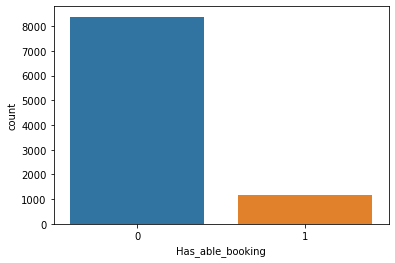

In [31]:
sns.countplot(x='Has_able_booking',data=zomato_data,saturation=0.75,linewidth=10)

In [33]:
#Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking
table_booking_Vs_No_booking=(len(zomato_data_rest_table_booking)/len(zomato_data_rest_table_no_booking))*100
table_booking_Vs_No_booking

13.813670523678873

Find out the percentage of restaurants providing online delivery

In [34]:
zomato_data.Has_Online_delivery.value_counts()

0    7090
1    2451
Name: Has_Online_delivery, dtype: int64

In [35]:
zomato_data_online_Delivery=zomato_data[zomato_data['Has_Online_delivery']==1]
len(zomato_data_online_Delivery)

2451

In [36]:
per_of_online_Delivery=((len(zomato_data_online_Delivery))/(len(zomato_data.Restaurant_ID)))*100
per_of_online_Delivery

25.68913111833141

In [37]:
#spliting cuisines into separate and giving number to it
def no_of_cuisines_per_Restaurant(Cuisine):
    return(len(Cuisine.split()))

In [38]:
zomato_data['No_of_Cuisines_Offered']=zomato_data.Cuisines.apply(no_of_cuisines_per_Restaurant)

In [39]:
zomato_data

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,Country,No_of_Cuisines_Offered
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,0,0,3,4.1,Very Good,1498,Indonesia,2
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,0,0,3,4.6,Excellent,873,Indonesia,3
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,0,0,3,4.9,Excellent,605,Indonesia,2
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,0,0,3,4.2,Very Good,395,Indonesia,1
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,0,0,3,4.3,Very Good,243,Indonesia,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,17582627,Senor Iguanas,216,Pocatello,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,"Pocatello, Pocatello",-112.443300,42.894200,Mexican,0,0,0,1,3.6,Good,108,United States,1
9547,16654702,Lake House Restaurant,37,Vineland Station,"3100 N Service Rd, Vineland Station, ON L0R2E0",Vineland Station,"Vineland Station, Vineland Station",-79.379147,43.186870,"Italian, Mediterranean, Pizza",70,0,0,4,4.3,Very Good,204,Canada,3
9548,16659169,Tokyo Sushi,37,Chatham-Kent,"150 Richmond St, Chatham-Kent, ON N7M2V2",Chatham-Kent,"Chatham-Kent, Chatham-Kent",-82.188438,42.397683,"Japanese, Sushi",25,0,0,2,3.7,Good,176,Canada,2
9549,16643459,Consort Restaurant,37,Consort,"4931 50th Street, Consort, AB T0C 1B0",Consort,"Consort, Consort",-110.774699,52.008289,"Chinese, Canadian",25,0,0,2,3.0,Average,6,Canada,2


In [40]:
zomato_data['City'].value_counts() # from this we get clear idea that New delhi has max no of restaurant zomato offering its servince

New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Paynesville          1
Randburg             1
Princeton            1
Yorkton              1
Name: City, Length: 140, dtype: int64

In [41]:
zomato_data['City'].value_counts().head() #from this we get top 5 cities having max no of zomato sevice offfering restaurants

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

In [42]:
zomato_data['City'].value_counts().head().values

array([5473, 1118, 1080,  251,   25], dtype=int64)

In [43]:
zomato_data['City'].value_counts().tail() #bottom 5 cities having least no of restaurants zomato offering 

Lakes Entrance    1
Paynesville       1
Randburg          1
Princeton         1
Yorkton           1
Name: City, dtype: int64

In [44]:
!pip install plotly

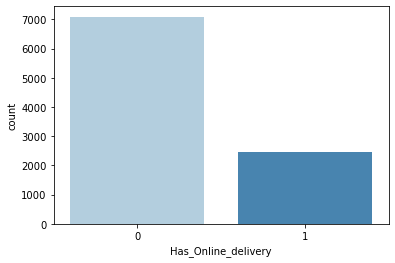

In [45]:
sns.countplot(x='Has_Online_delivery', data=zomato_data, palette="Blues");
plt.show()

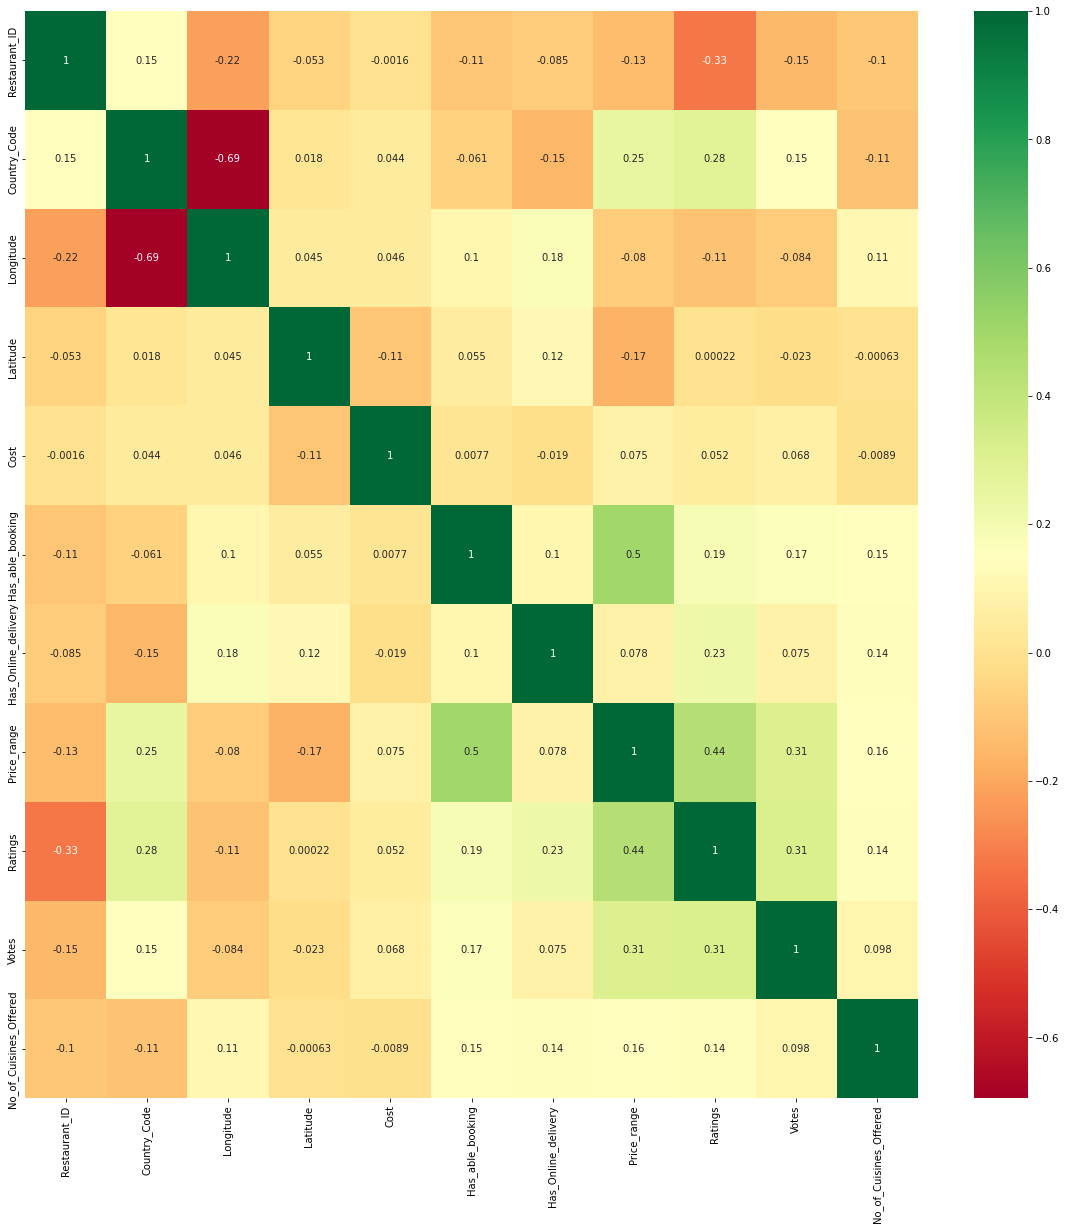

In [46]:
coormat=zomato_data.corr()
top_corr_features=coormat.index
plt.figure(figsize=(20,20))
#plot heatr map to show the corrrealtion between variables 
g=sns.heatmap(zomato_data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [47]:
#we are exploring India zomato data
india_zomato_data=zomato_data[zomato_data['Country_Code']==1].copy().reset_index(drop=True)
india_zomato_data

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,Country,No_of_Cuisines_Offered
0,2701,Orient Express - Taj Palace Hotel,1,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,8000,1,0,4,4.0,Very Good,145,India,1
1,309548,Tian - Asian Cuisine Studio - ITC Maurya,1,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000,0,0,4,4.1,Very Good,188,India,5
2,2742,Bukhara - ITC Maurya,1,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,North Indian,6500,0,0,4,4.4,Very Good,2826,India,2
3,301523,Nostalgia at 1911 Brasserie - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",6000,1,0,4,3.2,Average,12,India,2
4,2724,1911 - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000,1,0,4,3.9,Good,272,India,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,0,0,1,4.3,Very Good,63,India,5
8647,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,0,0,1,3.6,Good,34,India,3
8648,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,0,0,1,3.9,Good,127,India,7
8649,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,0,0,1,3.8,Good,78,India,2


In [48]:
india_zomato_data.shape

(8651, 19)

In [49]:
india_zomato_data.drop(['Country_Code','Address','Locality','Locality Verbose','Country'],inplace=True,axis=1)

In [50]:
india_zomato_data

,Restaurant_ID,Restaurant_Name,City,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,No_of_Cuisines_Offered
0,2701,Orient Express - Taj Palace Hotel,New Delhi,77.170087,28.595008,European,8000,1,0,4,4.0,Very Good,145,1
1,309548,Tian - Asian Cuisine Studio - ITC Maurya,New Delhi,77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000,0,0,4,4.1,Very Good,188,5
2,2742,Bukhara - ITC Maurya,New Delhi,77.173724,28.597466,North Indian,6500,0,0,4,4.4,Very Good,2826,2
3,301523,Nostalgia at 1911 Brasserie - The Imperial,New Delhi,77.218187,28.625445,"European, Continental",6000,1,0,4,3.2,Average,12,2
4,2724,1911 - The Imperial,New Delhi,77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000,1,0,4,3.9,Good,272,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,18279289,BMG - All Day Dining,Dehradun,78.068890,30.362686,"Chinese, North Indian, Fast Food",0,0,0,1,4.3,Very Good,63,5
8647,2300497,Atmosphere Grill Cafe Sheesha,Kanpur,80.354002,26.472001,"Indian, Chinese, Continental",0,0,0,1,3.6,Good,34,3
8648,18312106,UrbanCrave,Kanpur,80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,0,0,1,3.9,Good,127,7
8649,3900245,Deena Chat Bhandar,Varanasi,0.000000,0.000000,Street Food,0,0,0,1,3.8,Good,78,2


In [51]:
india_zomato_data['Has_Online_delivery'].replace((1,0),('Yes','No'),inplace=True)


In [52]:
india_zomato_data['Has_able_booking'].replace((1,0),('Yes','No'),inplace=True)

In [53]:
india_zomato_data

,Restaurant_ID,Restaurant_Name,City,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,No_of_Cuisines_Offered
0,2701,Orient Express - Taj Palace Hotel,New Delhi,77.170087,28.595008,European,8000,Yes,No,4,4.0,Very Good,145,1
1,309548,Tian - Asian Cuisine Studio - ITC Maurya,New Delhi,77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000,No,No,4,4.1,Very Good,188,5
2,2742,Bukhara - ITC Maurya,New Delhi,77.173724,28.597466,North Indian,6500,No,No,4,4.4,Very Good,2826,2
3,301523,Nostalgia at 1911 Brasserie - The Imperial,New Delhi,77.218187,28.625445,"European, Continental",6000,Yes,No,4,3.2,Average,12,2
4,2724,1911 - The Imperial,New Delhi,77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000,Yes,No,4,3.9,Good,272,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,18279289,BMG - All Day Dining,Dehradun,78.068890,30.362686,"Chinese, North Indian, Fast Food",0,No,No,1,4.3,Very Good,63,5
8647,2300497,Atmosphere Grill Cafe Sheesha,Kanpur,80.354002,26.472001,"Indian, Chinese, Continental",0,No,No,1,3.6,Good,34,3
8648,18312106,UrbanCrave,Kanpur,80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,No,No,1,3.9,Good,127,7
8649,3900245,Deena Chat Bhandar,Varanasi,0.000000,0.000000,Street Food,0,No,No,1,3.8,Good,78,2


In [54]:
india_zomato_data['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Lucknow           21
Bhubaneshwar      21
Guwahati          21
Amritsar          21
Surat             20
Puducherry        20
Nashik            20
Vizag             20
Kochi             20
Coimbatore        20
Vadodara          20
Patna             20
Nagpur            20
Varanasi          20
Mangalore         20
Dehradun          20
Allahabad         20
Mumbai            20
Aurangabad        20
Mysore            20
Bhopal            20
Agra              20
Kanpur            20
Jaipur            20
Bangalore         20
Pune              20
Chennai           20
Goa               20
Indore            20
Ludhiana          20
Ranchi            20
Kolkata           20
Ahmedabad         20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

In [55]:
#plotting graph for top 5 cities and bottom 5 cities that zomato is serving 
top5City=india_zomato_data['City'].value_counts().head().index
top5City

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad'], dtype='object')

In [56]:
bottom5City=india_zomato_data['City'].value_counts().tail().index
bottom5City

Index(['Hyderabad', 'Chandigarh', 'Secunderabad', 'Panchkula', 'Mohali'], dtype='object')

In [57]:
import matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.graph_objects as px
%matplotlib inline

In [120]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#10110011'

In [121]:
fig=make_subplots(rows=2,cols=1,subplot_titles=('Top 5 Cities','Bottom 5 Cities'))
labels=india_zomato_data['City'].value_counts().head().index
values=india_zomato_data['City'].value_counts().head().values
fig.add_trace(go.Bar(x=labels,y=values),1,1)
labels=india_zomato_data['City'].value_counts().tail().index
values=india_zomato_data['City'].value_counts().tail().values
fig.add_trace(go.Bar(x=labels,y=values),2,1)
fig.update_layout(height=800,width=500,showlegend=False)
fig.show()

In [60]:
india_zomato_data_City=india_zomato_data.groupby('City').mean().reset_index()
india_zomato_data_City

,City,Restaurant_ID,Longitude,Latitude,Cost,Price_range,Ratings,Votes,No_of_Cuisines_Offered
0,Agra,3.400166e+06,54.622830,19.016683,1065.000000,2.650000,3.965000,103.100000,3.300000
1,Ahmedabad,7.411896e+06,72.532802,23.036747,860.000000,2.550000,4.165000,574.850000,4.550000
2,Allahabad,3.974018e+06,61.378793,19.089371,517.500000,2.650000,3.395000,69.600000,3.650000
3,Amritsar,2.962221e+06,60.613098,25.611153,480.952381,1.809524,3.685714,174.523810,2.809524
4,Aurangabad,2.500118e+06,60.273820,15.901221,622.500000,2.200000,3.375000,64.800000,3.700000
5,Bangalore,1.103172e+07,77.634406,12.955034,1232.500000,2.700000,4.375000,2805.750000,3.500000
6,Bhopal,4.168672e+06,54.191668,16.260373,620.000000,2.150000,3.950000,143.850000,3.050000
7,Bhubaneshwar,8.791368e+06,69.477857,16.453017,678.571429,1.857143,3.980952,202.047619,3.190476
8,Chandigarh,1.216352e+05,76.789939,30.720205,1072.222222,2.500000,4.050000,574.611111,3.333333
9,Chennai,1.903664e+06,80.238150,13.034893,1085.000000,2.450000,4.315000,1384.750000,3.850000


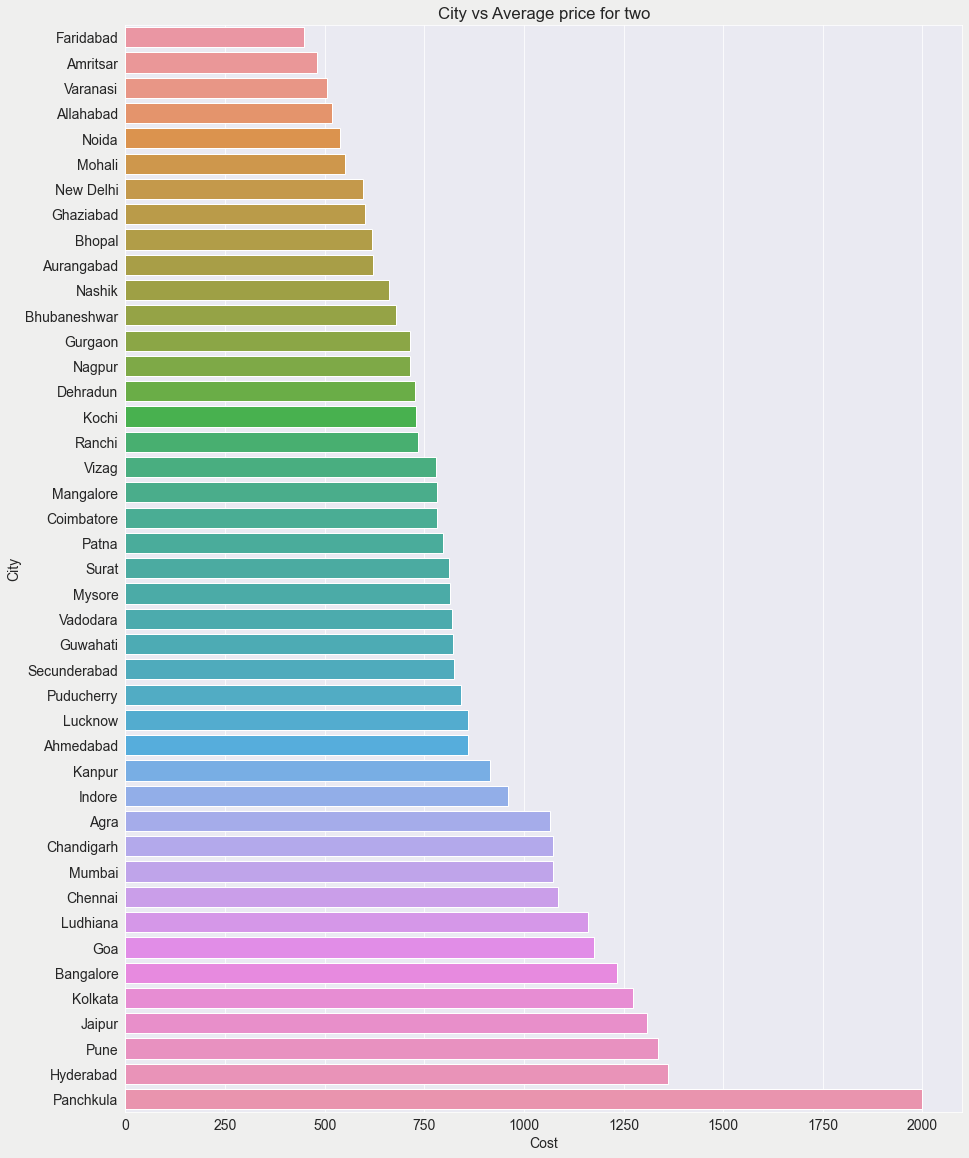

In [122]:
#cities with sorted order of average price for restaurants 
plt.figure(figsize=(15,20))
sns.barplot(data=india_zomato_data_City.sort_values('Cost'),x='Cost',y='City')
plt.title('City vs Average price for two')
plt.savefig('image4.png')

In [62]:
india_zomato_data

,Restaurant_ID,Restaurant_Name,City,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,No_of_Cuisines_Offered
0,2701,Orient Express - Taj Palace Hotel,New Delhi,77.170087,28.595008,European,8000,Yes,No,4,4.0,Very Good,145,1
1,309548,Tian - Asian Cuisine Studio - ITC Maurya,New Delhi,77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000,No,No,4,4.1,Very Good,188,5
2,2742,Bukhara - ITC Maurya,New Delhi,77.173724,28.597466,North Indian,6500,No,No,4,4.4,Very Good,2826,2
3,301523,Nostalgia at 1911 Brasserie - The Imperial,New Delhi,77.218187,28.625445,"European, Continental",6000,Yes,No,4,3.2,Average,12,2
4,2724,1911 - The Imperial,New Delhi,77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000,Yes,No,4,3.9,Good,272,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,18279289,BMG - All Day Dining,Dehradun,78.068890,30.362686,"Chinese, North Indian, Fast Food",0,No,No,1,4.3,Very Good,63,5
8647,2300497,Atmosphere Grill Cafe Sheesha,Kanpur,80.354002,26.472001,"Indian, Chinese, Continental",0,No,No,1,3.6,Good,34,3
8648,18312106,UrbanCrave,Kanpur,80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,No,No,1,3.9,Good,127,7
8649,3900245,Deena Chat Bhandar,Varanasi,0.000000,0.000000,Street Food,0,No,No,1,3.8,Good,78,2


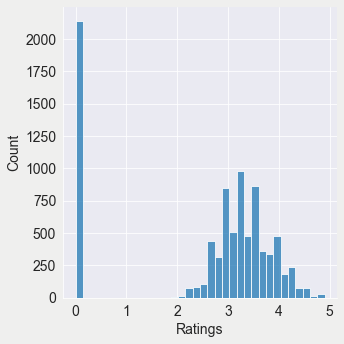

In [123]:
sns.displot(india_zomato_data.Ratings)
plt.savefig('image5.png')

From this graph we get clear idea that overall ratings lies between 2 to 4.5 fery few restaurants are there with ratings 5

relationship between ratings and price of restaurants with respect to online delivey of food 

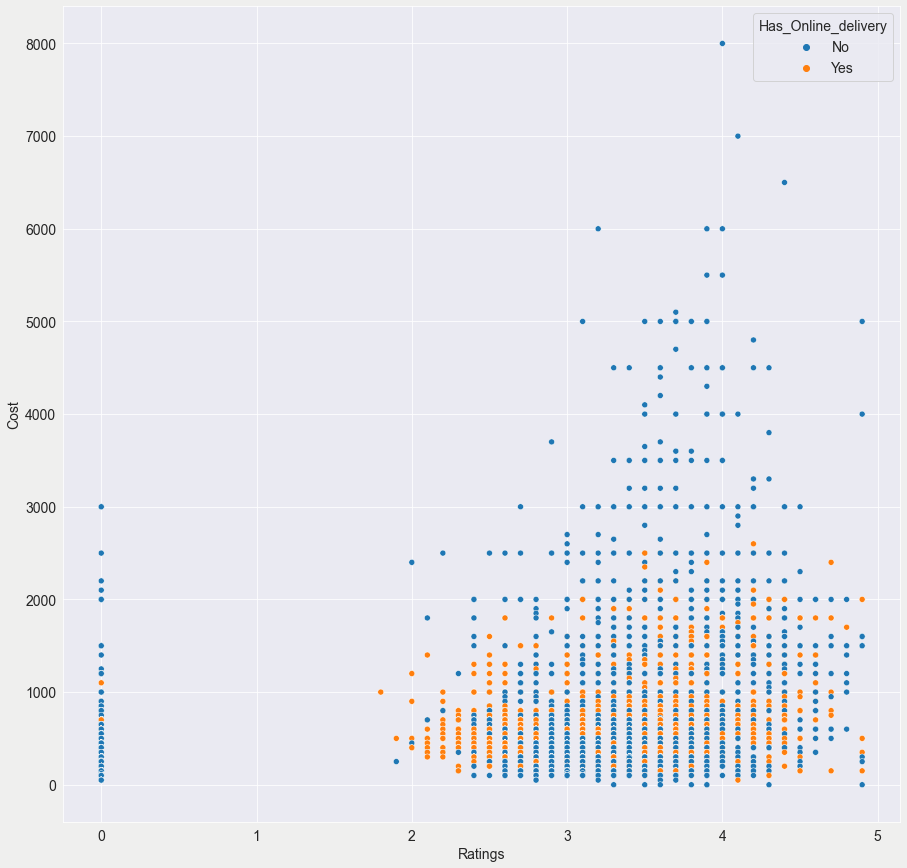

In [124]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Ratings',y='Cost',data=india_zomato_data,hue='Has_Online_delivery')

In [ ]:
# from this we get clear idea that average ratings does not seem to be affect the availability of online delivery 

relationship between ratings and price of restaurants with respect to prebooking of table 

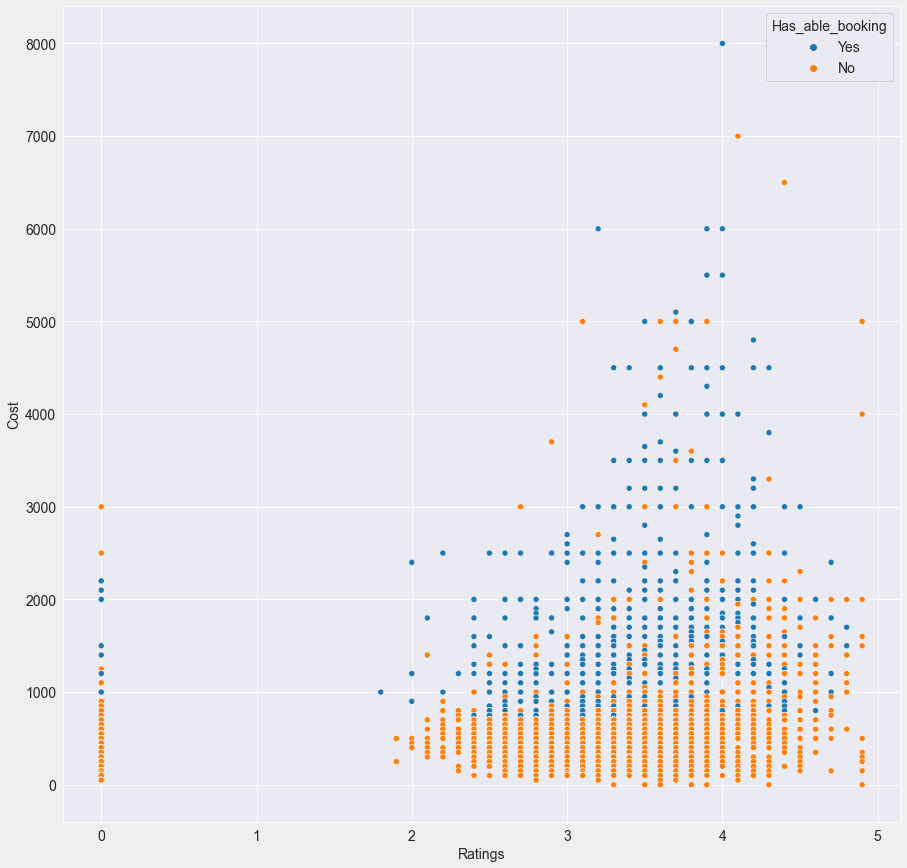

In [125]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Ratings',y='Cost',data=india_zomato_data,hue='Has_able_booking')

From this scatterplot we get idea that most of the restaurants lie in the range 2.5 to 4.5 stars
Most of the restaurants having cost price is 2500
Most of the restaurants having their cost price as Rs.1000 offer pretable booking 


In [67]:
res_df=india_zomato_data['Restaurant_Name'].value_counts().reset_index().rename(columns={'index':'rest_name','Restaurant_Name':'rest_count'})
res_df

,rest_name,rest_count
0,Cafe Coffee Day,83
1,Domino's Pizza,79
2,Subway,63
3,Green Chick Chop,51
4,McDonald's,48
...,...,...
6598,Cake Symphony,1
6599,Superstar CafÌ©,1
6600,QRO Gourmeteriia BY DARK HOUSE KAFE,1
6601,Espress-o-Ville,1


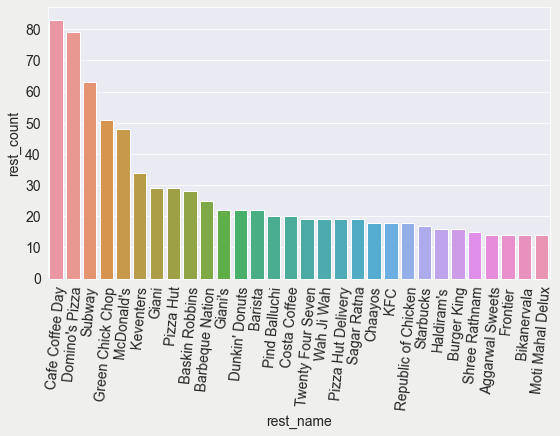

In [126]:
plt.xticks(rotation=85)
sns.barplot(x='rest_name',y='rest_count',data=res_df.head(30))

In [77]:
#top 3 restaurants are Cafe Coffee day ,Domino's Pizza and Subway

In [94]:
india_zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8651 entries, 0 to 8650
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant_ID           8651 non-null   int64  
 1   Restaurant_Name         8651 non-null   object 
 2   City                    8651 non-null   object 
 3   Longitude               8651 non-null   float64
 4   Latitude                8651 non-null   float64
 5   Cuisines                8651 non-null   object 
 6   Cost                    8651 non-null   int64  
 7   Has_able_booking        8651 non-null   object 
 8   Has_Online_delivery     8651 non-null   object 
 9   Price_range             8651 non-null   int64  
 10  Ratings                 8651 non-null   float64
 11  Rating_text             8651 non-null   object 
 12  Votes                   8651 non-null   int64  
 13  No_of_Cuisines_Offered  8651 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memor

In [98]:
#finding city where restaurants having ratings greater than 4 ,which offfers atleast 2 cuisines ,and which has been visited by atleast 100 people 
recommend_df=india_zomato_data.loc[(india_zomato_data.Ratings)>4 &(india_zomato_data.Votes>=100)&(india_zomato_data.No_of_Cuisines_Offered>=2)].sort_values(by='Ratings')
recommend_df.tail()

,Restaurant_ID,Restaurant_Name,City,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,No_of_Cuisines_Offered
12,18345728,Masala Library,New Delhi,77.218645,28.618245,Modern Indian,5000,No,No,4,4.9,Excellent,408,2
483,3300958,Barbeque Nation,Nagpur,79.080247,21.143272,"North Indian, European, Mediterranean",1600,No,No,4,4.9,Excellent,226,4
548,18416632,The Great Indian Pub,Dehradun,78.068022,30.361281,North Indian,1500,No,No,4,4.9,Excellent,50,2
596,2100702,Barbeque Nation,Guwahati,91.759857,26.172119,North Indian,1500,No,No,4,4.9,Excellent,774,2
533,2800856,Barbeque Nation,Vizag,0.000000,0.000000,"North Indian, Chinese, Mediterranean",1600,No,No,4,4.9,Excellent,345,4


In [ ]:
#we get idea that having 4.9 ratings we got 5 top cities are New Delhi,Nagpur, Dehradun,Guwahati,Vizag

We can find out cities wise restaurants which provide online booking having good ratings and provide more than 2 cuisines and is should be visited by atleast 100 people

In [100]:
Nagpur_recommend_df=recommend_df.loc[(recommend_df.City=='Nagpur')
                                     &(recommend_df.Ratings>4)&(recommend_df.Votes>=100)
                                     &(recommend_df.No_of_Cuisines_Offered>=2)]
Nagpur_recommend_df #Nagpur has only 4 restaurants which allows this 

,Restaurant_ID,Restaurant_Name,City,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,No_of_Cuisines_Offered
831,3300041,Ashoka Restaurant,Nagpur,79.079819,21.159225,"North Indian, Chinese, Continental",1300,No,Yes,3,4.2,Very Good,275,4
1064,3300065,FSB,Nagpur,79.080477,21.138510,"Continental, North Indian, Thai, Chinese",1100,No,No,3,4.3,Very Good,270,5
941,3300107,The Zuree Urban Kitchen,Nagpur,79.081847,21.158481,"North Indian, Italian, Continental",1200,No,Yes,3,4.4,Very Good,257,4
483,3300958,Barbeque Nation,Nagpur,79.080247,21.143272,"North Indian, European, Mediterranean",1600,No,No,4,4.9,Excellent,226,4


In [107]:
Mumbai_recommend_df=recommend_df.loc[(recommend_df.City=='Mumbai')
                                     &(recommend_df.Ratings>4)&(recommend_df.Votes>=100)
                                     &(recommend_df.No_of_Cuisines_Offered>=2)]
Mumbai_recommend_df
Mumbai_recommend_df#Mumbai  has only 8 restaurants which allows this 

,Restaurant_ID,Restaurant_Name,City,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,No_of_Cuisines_Offered
1203,18270976,Tea Villa Cafe,Mumbai,72.813074,19.131141,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",1000,Yes,Yes,3,4.1,Very Good,1295,7
1199,18237753,Tea Villa Cafe,Mumbai,72.833984,19.055831,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",1000,Yes,Yes,3,4.1,Very Good,2040,7
616,18233317,145 Kala Ghoda,Mumbai,72.832585,18.927584,"Fast Food, Beverages, Desserts",1500,No,No,3,4.2,Very Good,1606,4
618,49003,SpiceKlub,Mumbai,72.825553,18.994237,North Indian,1500,No,Yes,3,4.2,Very Good,3370,2
617,18313566,Farzi Cafe,Mumbai,72.827650,19.003517,Modern Indian,1500,No,No,3,4.3,Very Good,1240,2
3612,18408295,Stacks And Racks,Mumbai,72.836191,19.181300,"American, Burger, Fast Food",500,No,No,2,4.6,Excellent,413,4
1198,18075122,The Fusion Kitchen,Mumbai,72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",1000,Yes,Yes,3,4.7,Excellent,2083,5
620,17806994,Mirchi And Mime,Mumbai,72.907385,19.120083,"North Indian, South Indian, Mughlai",1500,No,No,3,4.9,Excellent,3244,5


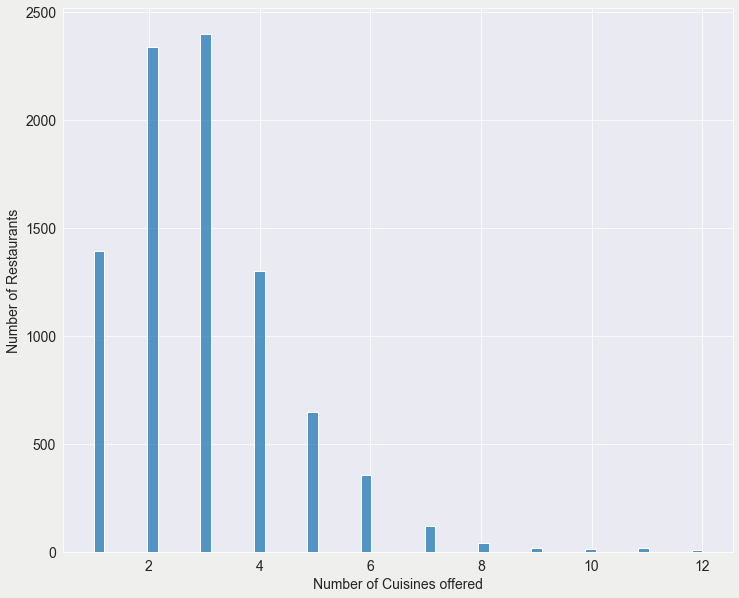

In [127]:
#plotting graphs between no of cuisines offered and no of restaurants 
plt.figure(figsize=(12,10))
plt.xlabel('Number of Cuisines offered')
plt.ylabel('Number of Restaurants')
sns.histplot(data=india_zomato_data,x='No_of_Cuisines_Offered')
plt.savefig('image9.png')

In [117]:
# still we have some restaurants which havig lower ratings or we can say 0 ratings 
india_zomato_data_0_Ratings=india_zomato_data[india_zomato_data.Ratings==0]
india_zomato_data_0_Ratings

,Restaurant_ID,Restaurant_Name,City,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,No_of_Cuisines_Offered
88,18466422,Playboy Club,New Delhi,77.197445,28.595791,Finger Food,3000,No,No,4,0.0,Not rated,3,2
99,18415386,Aqua Grill - Pride Plaza Hotel,New Delhi,77.122890,28.552732,"Continental, North Indian",3000,No,No,4,0.0,Not rated,0,3
128,18441707,Courtyard Grill - Courtyard by Marriott,Gurgaon,77.080367,28.460925,"Chinese, North Indian, Italian",2500,No,No,4,0.0,Not rated,3,4
210,18317498,The Butler & The Chef - Jaypee Greens,Noida,77.521526,28.464167,Finger Food,2200,Yes,No,4,0.0,Not rated,1,2
213,17977757,Coffee to Cocktail Bar - Hyatt Place,Gurgaon,77.065978,28.500845,Drinks Only,2100,Yes,No,4,0.0,Not rated,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8634,18492057,Shree Raja Ram,New Delhi,77.105552,28.639813,Fast Food,50,No,No,1,0.0,Not rated,0,2
8637,302835,Aggarwal Jalebi Wale,New Delhi,77.063507,28.621719,Street Food,50,No,No,1,0.0,Not rated,3,2
8639,18424202,Famous Parantha and Poori Sabzi,New Delhi,77.308509,28.589376,North Indian,50,No,No,1,0.0,Not rated,0,2
8640,18372694,Sweets n Treats,New Delhi,77.306843,28.591180,Street Food,50,No,No,1,0.0,Not rated,0,2


In [119]:
#we have one omre list of restaurants where no one has visited or still it is not opened 
india_zomato_data_0_Votes=india_zomato_data[india_zomato_data.Votes==0]
india_zomato_data_0_Votes #we have 1093 such restaurants which has 0 voters means no one has visited that restaurants

,Restaurant_ID,Restaurant_Name,City,Longitude,Latitude,Cuisines,Cost,Has_able_booking,Has_Online_delivery,Price_range,Ratings,Rating_text,Votes,No_of_Cuisines_Offered
99,18415386,Aqua Grill - Pride Plaza Hotel,New Delhi,77.122890,28.552732,"Continental, North Indian",3000,No,No,4,0.0,Not rated,0,3
213,17977757,Coffee to Cocktail Bar - Hyatt Place,Gurgaon,77.065978,28.500845,Drinks Only,2100,Yes,No,4,0.0,Not rated,0,2
293,18317479,London Eye - The Open Lounge,New Delhi,77.243075,28.646467,Finger Food,2000,Yes,No,4,0.0,Not rated,0,2
317,301461,Airborne,Noida,77.338752,28.563752,"North Indian, Chinese, Continental, Mughlai",2000,Yes,No,4,0.0,Not rated,0,5
319,18430587,Malt n Brew,Noida,0.000000,0.000000,"North Indian, Continental, Chinese",2000,Yes,No,4,0.0,Not rated,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8633,18430905,Ram Ram Ji Kachori Bhandar,New Delhi,77.107930,28.636034,Street Food,50,No,No,1,0.0,Not rated,0,2
8634,18492057,Shree Raja Ram,New Delhi,77.105552,28.639813,Fast Food,50,No,No,1,0.0,Not rated,0,2
8639,18424202,Famous Parantha and Poori Sabzi,New Delhi,77.308509,28.589376,North Indian,50,No,No,1,0.0,Not rated,0,2
8640,18372694,Sweets n Treats,New Delhi,77.306843,28.591180,Street Food,50,No,No,1,0.0,Not rated,0,2


Finding which Cuisines is mostly liked by people all over India
-->for that we first need to split all cuisine and maintain a list 
-->We have to create one function which will split the cuisines by 

In [170]:
def no_restaurant_per_cuisine(df):
    cuisine_count={}
    for cuisine in df['Cuisines']:
         for c in str(cuisine).split(','):
                if c in cuisine_count:
                    cuisine_count[c]=cuisine_count[c]+1
                else:
                    cuisine_count[c]=1
    return pd.DataFrame(cuisine_count,index=['count']).transpose().reset_index().rename(columns={'index':'Cuisine'})

In [172]:
cuisine_df=no_restaurant_per_cuisine(india_zomato_data)
cuisine_df

,Cuisine,count
0,European,47
1,Asian,45
2,Japanese,48
3,Korean,9
4,Thai,189
...,...,...
154,Cajun,1
155,Maharashtrian,6
156,Beverages,77
157,Malwani,1


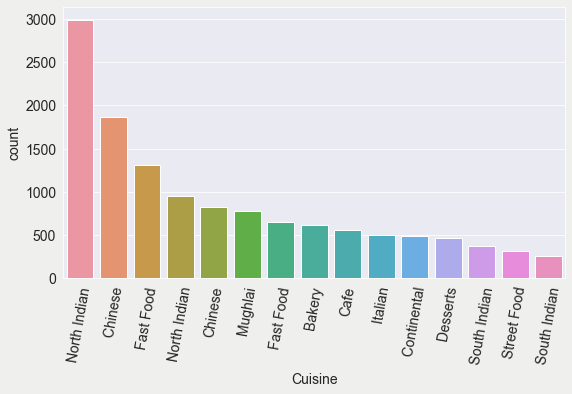

In [177]:
plt.xticks(rotation=80)
sns.barplot(x='Cuisine',y='count',data=cuisine_df.sort_values(by='count',ascending=False).head(15))
plt.savefig('image11.png')
